# COSC2753 - Assignment 1 - Length of Stay Prediction 

**RMIT University Vietnam**

**Course:** COSC2753

**Name:** Pham Cong Minh

**ID:** s3818102

**Lecturer:** Dr. Duy Dang Pham Thien

**Submission Due Date:** 16 April 2021

## Main task

Predict if a given patient (i.e. a new born child) will be discharged from the hospital within 3 days (class 0) or will stay in hospital beyond that (class 1). The required model are logistic regression or its variant for binary classification

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('dark_background')

pd.set_option('display.max_columns', 70)

## 2. Read train data & inspect

### 2.1 Read data

In [2]:
# Import the train dataset
train_data = pd.read_csv('train_data.csv').drop(['ID', 'HealthServiceArea'], axis=1)
train_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


### 2.2 Inspect data

In [3]:
# Analyze descriptive statistics
train_data.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


In [4]:
# Number of columns and rows
train_data.shape

(59966, 14)

In [5]:
# Analyze dtypes
train_data.dtypes

Gender                          object
Race                            object
TypeOfAdmission                 object
CCSProcedureCode                 int64
APRSeverityOfIllnessCode         int64
PaymentTypology                 object
BirthWeight                      int64
EmergencyDepartmentIndicator    object
AverageCostInCounty              int64
AverageChargesInCounty           int64
AverageCostInFacility            int64
AverageChargesInFacility         int64
AverageIncomeInZipCode           int64
LengthOfStay                     int64
dtype: object

In [6]:
# Check missing value and percentage
def missing_value_of_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = round(total/data.shape[0]*100,2)
    return pd.concat([total,percentage], axis=1, keys=['Total','Percentage'])

In [7]:
missing_value_of_data(train_data)

,Total,Percentage
Gender,0,0.0
Race,0,0.0
TypeOfAdmission,0,0.0
CCSProcedureCode,0,0.0
APRSeverityOfIllnessCode,0,0.0
PaymentTypology,0,0.0
BirthWeight,0,0.0
EmergencyDepartmentIndicator,0,0.0
AverageCostInCounty,0,0.0
AverageChargesInCounty,0,0.0


In general, there is no missing data and the data types are object (categorical data) and integer (numerical measurement data)

## 3. Data transformation and visualization

### 3.1. Displot train dataset

In [8]:
# Displot number attributes
def displotsns(df, ncols):
    nrows = len(df.columns) // ncols 
    
    f, axes = plt.subplots(nrows, ncols, figsize=(20,15), sharex=False)
    row = 0
    plot = 0
    for c in df.columns:
        sns.distplot(df[c], hist=True, color = 'r', kde = True, ax = axes[row][plot])
        plot += 1
        if plot == ncols:
            plot = 0
            row+=1

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

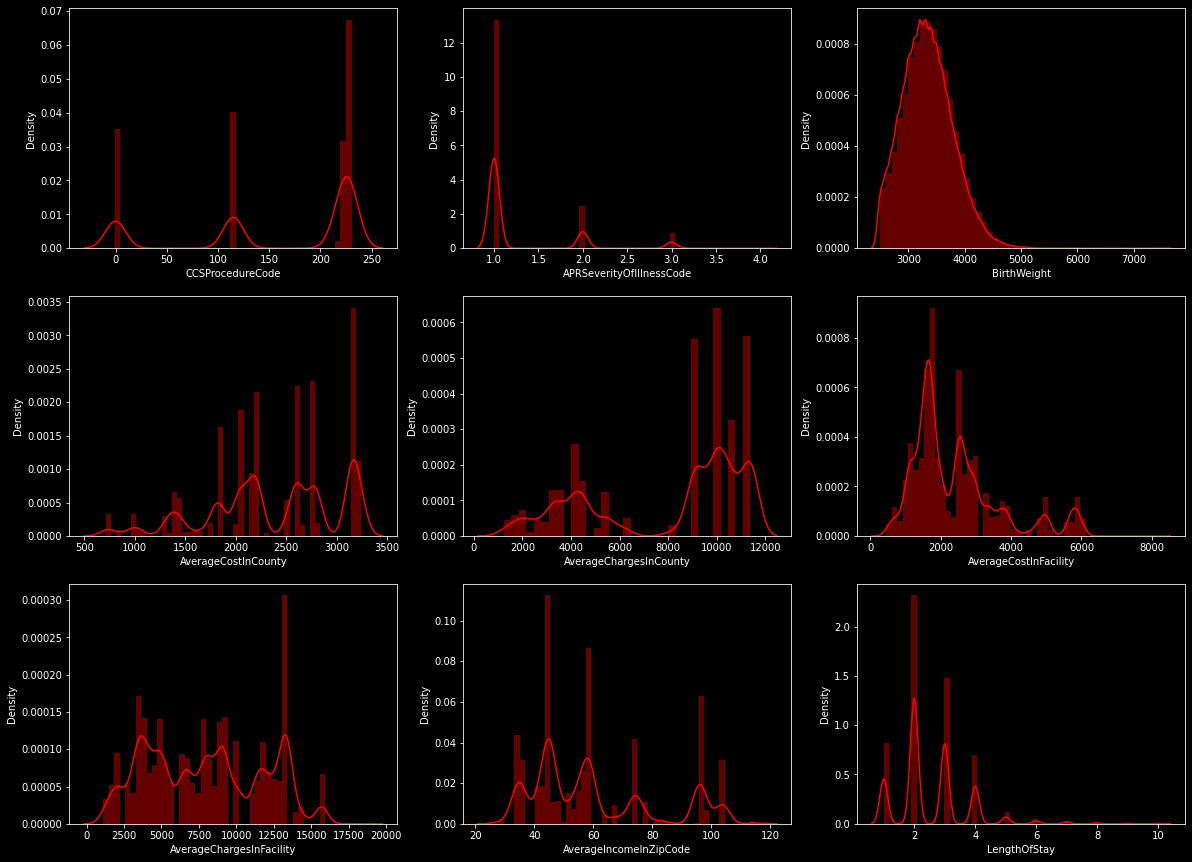

In [9]:
num_cols = ['CCSProcedureCode',
            'APRSeverityOfIllnessCode',
            'BirthWeight',
            'AverageCostInCounty',
            'AverageChargesInCounty',
            'AverageCostInFacility',
            'AverageChargesInFacility',
            'AverageIncomeInZipCode',
            'LengthOfStay']

# Call function
displotsns(train_data[num_cols],3)

From the figures above, it can be seen that CSSProcedureCode is categorical and APRSeverityOfIllnessCode is ranked-order. Except for BirthWeight and AverageCostInFacility have the right-skewed shape, other attributes are quite fluctuated and not fully continious. In the LengthOfStay, the number of class 1 (more than 3 days) is expected to be highly lower in comparison with class 0.

### 3.3. Deep inspection to consider anomaly data point(s)

In [10]:
for col in train_data.columns:
    print(col)
    count = train_data[col].value_counts()
    percent = train_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

Gender
   Counts Percent
M   30978  51.66%
F   28987  48.34%
U       1    0.0%
--------------------------------
Race
                        Counts Percent
White                    32943  54.94%
Other Race               18314  30.54%
Black/African American    8183  13.65%
Multi-racial               526   0.88%
--------------------------------
TypeOfAdmission
           Counts Percent
Newborn     58741  97.96%
Emergency     659    1.1%
Urgent        412   0.69%
Elective      154   0.26%
--------------------------------
CCSProcedureCode
      Counts Percent
 228   19886  33.16%
 115   13628  22.73%
 0     11189  18.66%
 220   10773  17.97%
 231    2981   4.97%
-1       769   1.28%
 216     740   1.23%
--------------------------------
APRSeverityOfIllnessCode
   Counts Percent
1   47953  79.97%
2    8760  14.61%
3    3252   5.42%
4       1    0.0%
--------------------------------
PaymentTypology
                           Counts Percent
Medicaid                    28723   47.9%
Private He

* In Gender, “Unknown” gender can be considered as an outliner (only appears once). Gender is categorical data so we can drop “U” column after encoding.

* In TypeOfSubmission, “Trauma” and “Not Available” haven’t been seen.

* In CCSProcedureCode, -1 may imply something wrong (missing value), but with 1.28%, we will treat it as categorical data.

* In APRSeverityOfIllnessCode, 4 can be considered as an outliner (only appears once). But it’s rank data (from Minor (1) to Extreme (4)), we can’t drop or transform any row.

### 3.2. Convert LoS to binary targets

In [11]:
# Class 0 is less than 3 days and 1 otherwise
train_data['LengthOfStay'] = train_data['LengthOfStay'].apply(lambda x: 0 if int(x) <= 3 else 1)
train_data['LengthOfStay'].value_counts()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


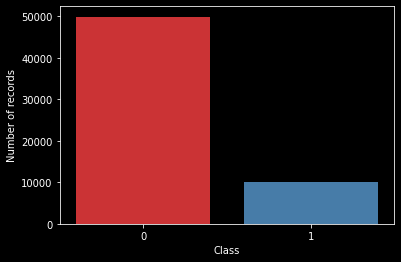

In [12]:
# Countplot the transform value
sns.countplot(train_data['LengthOfStay'], palette='Set1')
plt.xlabel('Class')
plt.ylabel('Number of records')
plt.show()

=> The ratio is 1/5 and can be considered as quite unbalance dataset. In-depth metrics (such as precision, recall, and F1 score) should be cover more than just rely on accuracy score

### 3.3 Plot the attributes of class 0 and 1

In [13]:
# Draw the histogram for class 0 and 1
def Facet_Grid_sns(df):
    for c in df.columns:
        g = sns.FacetGrid(df, col='LengthOfStay',height =4, aspect = 2)
        g.map(plt.hist, str(c) ,bins=20)
        g.set_axis_labels(c, "Count")

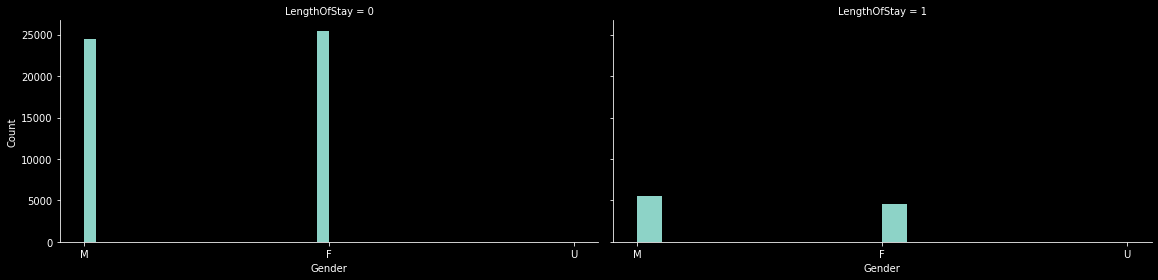

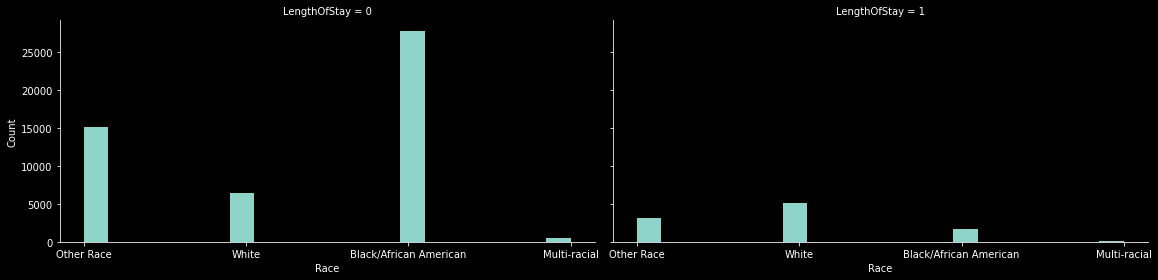

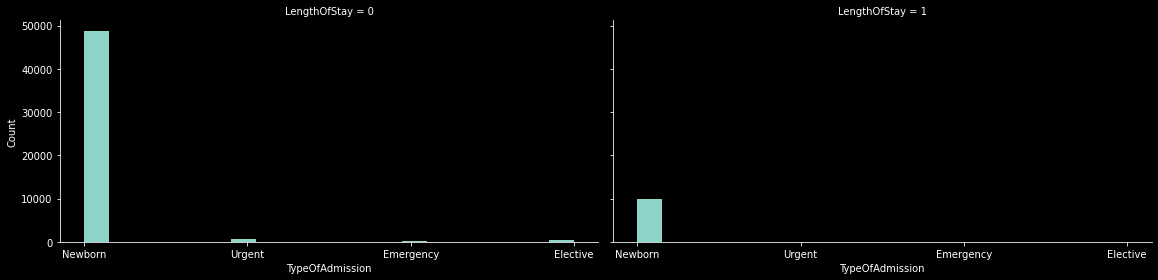

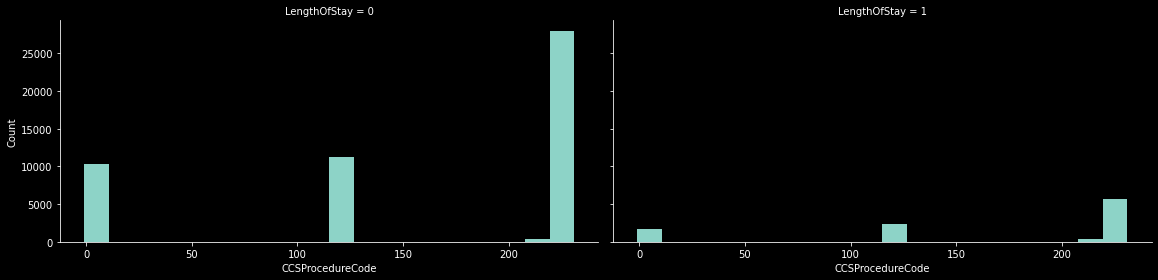

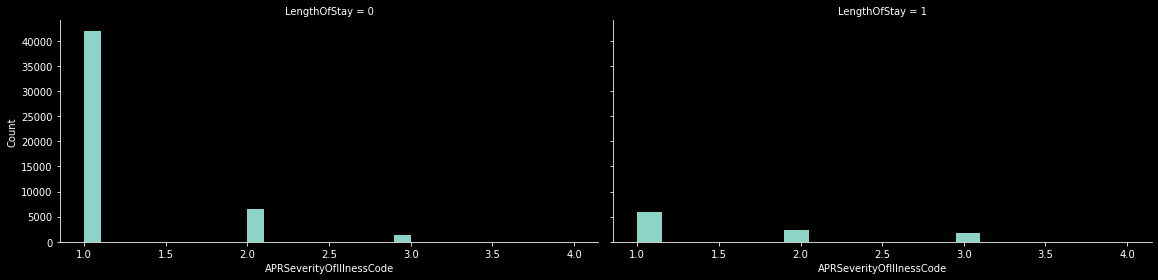

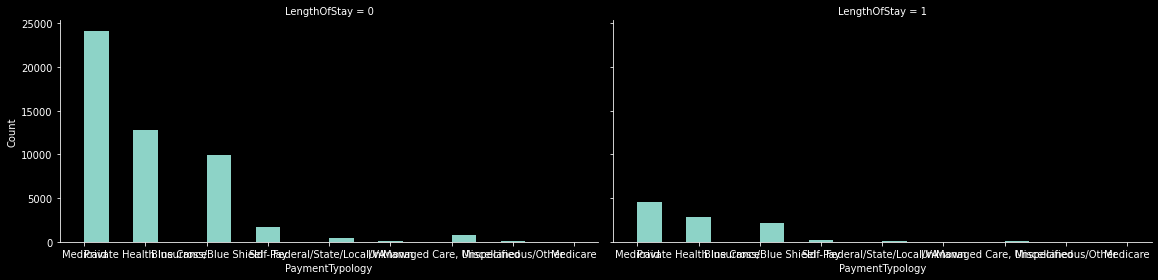

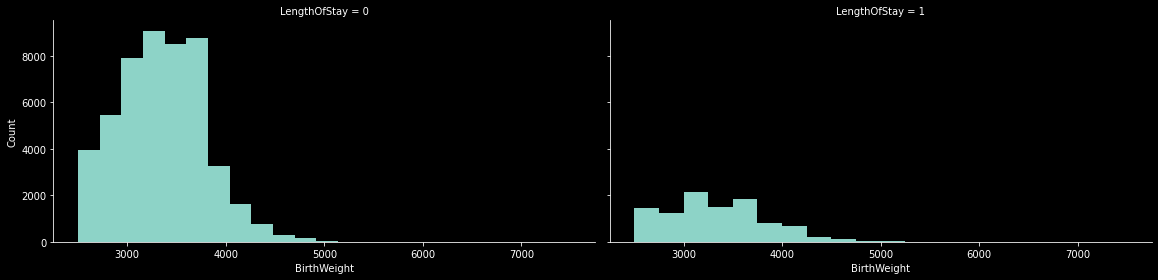

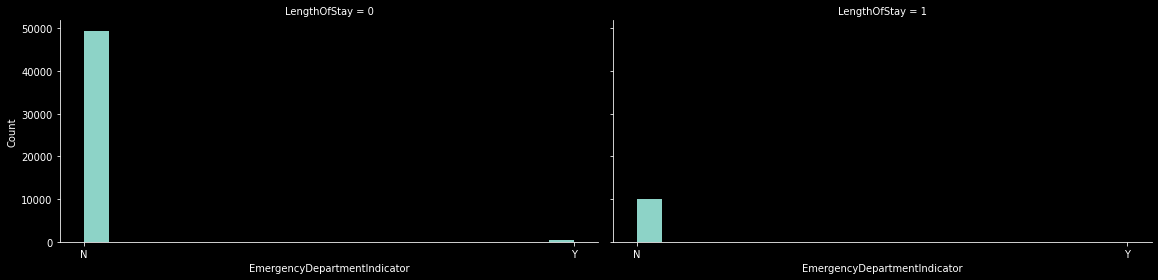

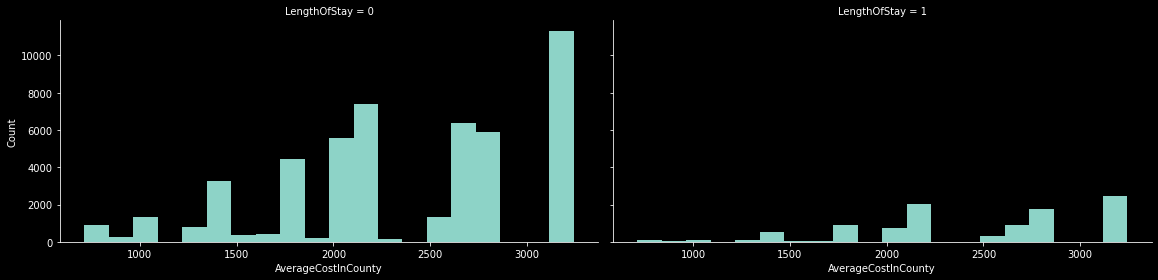

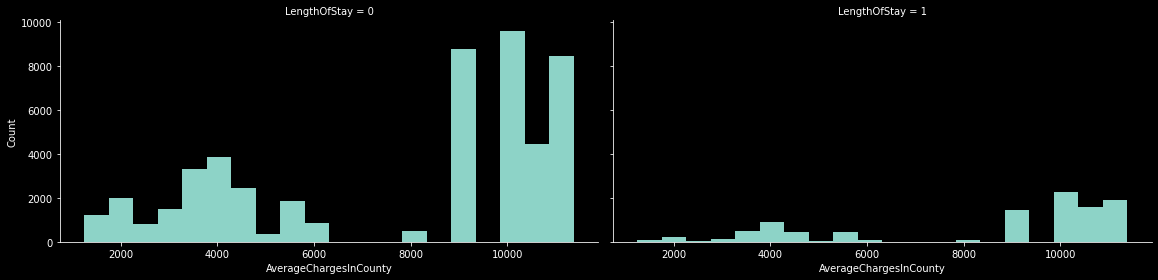

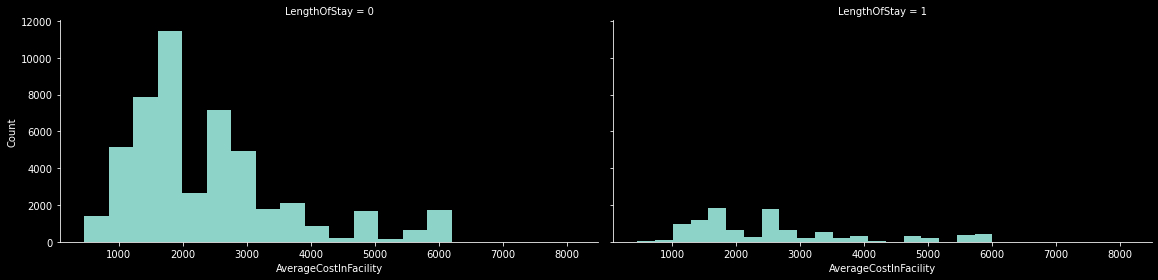

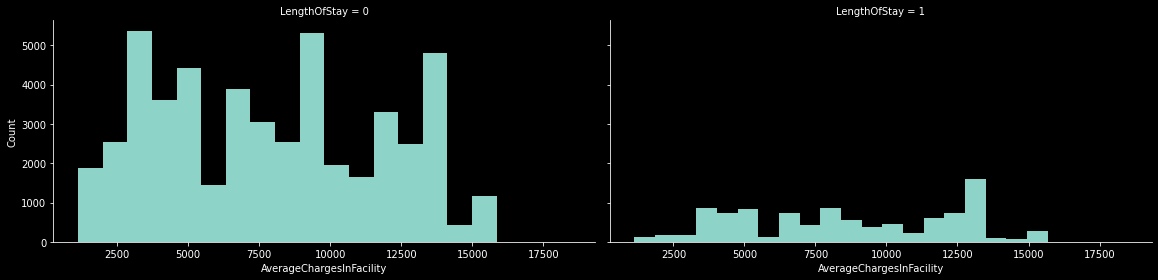

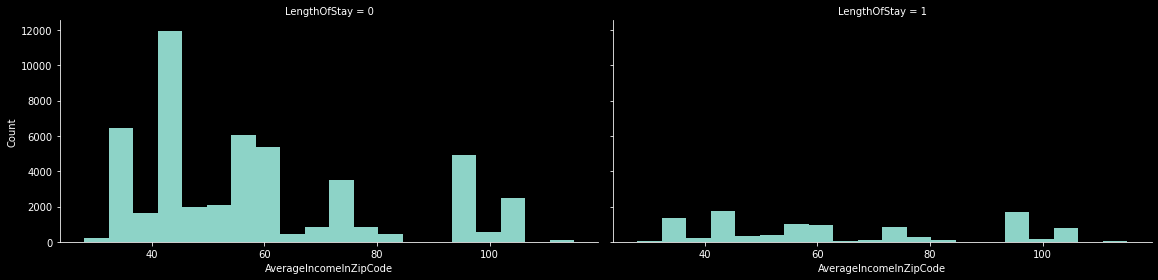

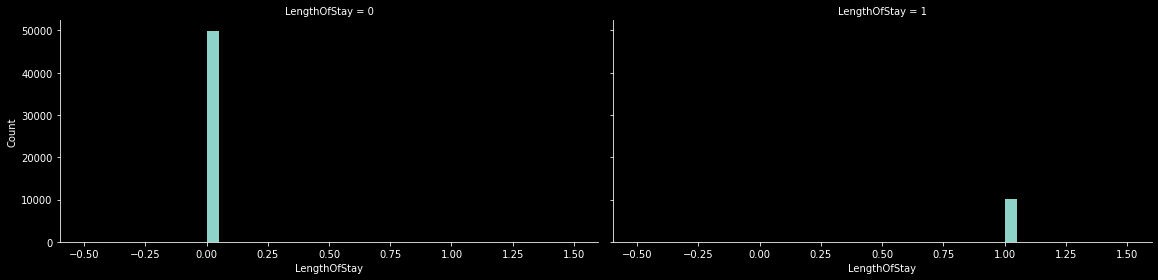

In [14]:
Facet_Grid_sns(train_data)

* Gender ratio is equal in classification
* Some attributes such as white race, new born admission type, and 228 CSS code tend to have more chance to be indentified as class 1
* The BirthWeight between 3000g and 4000g are the majority in both class 0 and 1
* The distribution of numerical value between class 0 and 1 seem to be similar, but in class 1 there are usually less than 2000 count for the highest values. 

## 4. Data preparation

### 3.2 Split into X and y

In [15]:
X = train_data.drop('LengthOfStay', axis=1)
y = train_data['LengthOfStay']

### 4.1.  Encode norminal data

In [16]:
# Make a copy of X to prevent data lost if choose the wrong way
X_copy = X.copy()

# Determine norminal (categorical) data
encode_col = ['Gender', 
              'Race',
              'TypeOfAdmission', 
              'CCSProcedureCode',
              'PaymentTypology']

# Dummy encode process
for col in encode_col:
    dummy = pd.get_dummies(X_copy[col])  # Extract the labels
    X_copy = pd.concat([X_copy, dummy], axis=1)  # Append the encoded label to X 
    X_copy = X_copy.drop(col, axis=1)  # Drop the initial column after encode

# Check X_copy
X_copy.columns

Index([    'APRSeverityOfIllnessCode',                  'BirthWeight',
       'EmergencyDepartmentIndicator',          'AverageCostInCounty',
             'AverageChargesInCounty',        'AverageCostInFacility',
           'AverageChargesInFacility',       'AverageIncomeInZipCode',
                                  'F',                            'M',
                                  'U',       'Black/African American',
                       'Multi-racial',                   'Other Race',
                              'White',                     'Elective',
                          'Emergency',                      'Newborn',
                             'Urgent',                             -1,
                                    0,                            115,
                                  216,                            220,
                                  228,                            231,
             'Blue Cross/Blue Shield',       'Federal/State/Local/VA',
      

### 4.2. Drop outliner encoded-columns

The more attributes, the more complexity for our model. The "EmergencyDepartmentIndicator" can be converted to binary to minimize 1 column. We can also drop the "U" gender as afroidmentioned.

In [17]:
# Convert Yes-No to binary 1-0 
X_copy['EmergencyDepartmentIndicator'] = X_copy['EmergencyDepartmentIndicator'].apply(lambda x: 1 if x == "Y" else 0)

# Drop encoded-columns
X_copy.drop(columns = ['U'],inplace = True)

In [18]:
X_copy.shape

(59966, 34)

### 4.1 Plot heatmap for correlations (encoded data)

<AxesSubplot:>

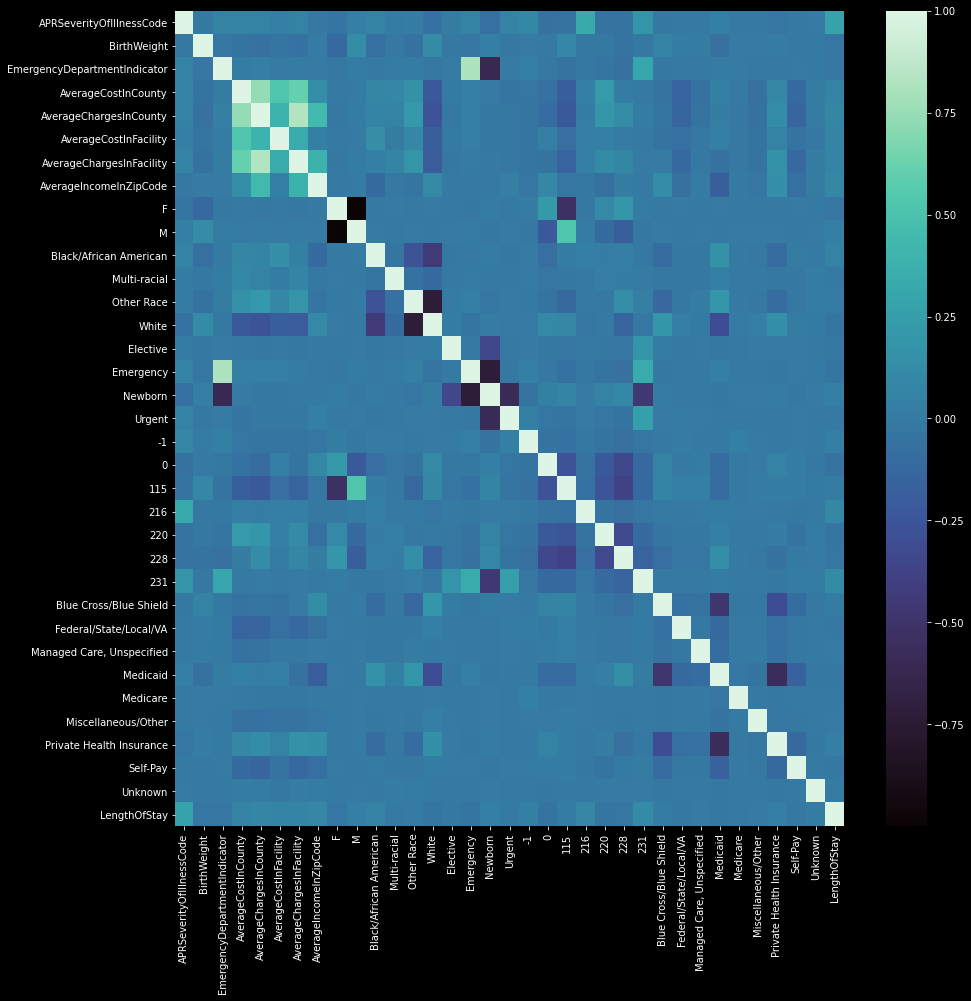

In [19]:
# Inspect correlation
tmp = pd.concat([X_copy, y], axis=1)  # Create a temporary dataframe to join X and y
correlations = tmp.corr()  # Compute correlation between attributes
fig, ax = plt.subplots(figsize=(15,15))   # Figure size innitialize

sns.heatmap(correlations, ax = ax, cmap ='mako')  # Draw heatmap

For the "LengthOfStay" in the last row, it seems like there are not so much feature attributes that affect the classification. The average cost and income seems to have strong correlations, but in this problem we're not allow to perform feature engineering so just leave it there.

## 5. Split data into training and testing set

### 5.1 Split dataset

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, 
                                                    test_size=0.25, 
                                                    random_state = 2, 
                                                    stratify = y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44974, 34)
(14992, 34)
(44974,)
(14992,)


<font color=red> **Parameters:** </font>

<font color=green>test_size </font> = 0.25: Personal preference

<font color=green>random_state </font> = 2: Using an int will produce the same results across different calls 

<font color=green>stratify </font> = y: Ensure the random split ratio of 0 and 1 in train and test 

In [21]:
# Check X_train
X_train

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,Multi-racial,Other Race,White,Elective,Emergency,Newborn,Urgent,-1,0,115,216,220,228,231,Blue Cross/Blue Shield,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown
30691,3,2600,0,3155,11381,2895,13394,45,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
50762,1,3900,0,2611,9227,3790,6250,45,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
29845,2,2700,0,1860,2846,1860,2846,53,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
21852,1,2600,0,2018,3610,2018,3610,52,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8701,1,3400,0,2777,1587,2777,1587,54,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,1,2600,0,3155,11381,3032,10135,115,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
34101,1,3500,0,1445,3419,1691,3761,36,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
11723,1,3600,0,1826,4190,1459,3505,55,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1274,1,3000,0,3155,11381,3032,10135,84,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### 5.2 Reset index

In [22]:
def df_reset_index(x):
    return x.reset_index().drop('index', axis = 1)

X_train = df_reset_index(X_train)
X_test = df_reset_index(X_test)
y_train = df_reset_index(y_train)
y_test = df_reset_index(y_test)

In [23]:
# Check X_train
X_train

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,Multi-racial,Other Race,White,Elective,Emergency,Newborn,Urgent,-1,0,115,216,220,228,231,Blue Cross/Blue Shield,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown
0,3,2600,0,3155,11381,2895,13394,45,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,3900,0,2611,9227,3790,6250,45,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,2700,0,1860,2846,1860,2846,53,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,2600,0,2018,3610,2018,3610,52,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,3400,0,2777,1587,2777,1587,54,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44969,1,2600,0,3155,11381,3032,10135,115,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
44970,1,3500,0,1445,3419,1691,3761,36,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
44971,1,3600,0,1826,4190,1459,3505,55,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
44972,1,3000,0,3155,11381,3032,10135,84,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


## 6. Scale data

The data to fit into some model need to be scale (For example: XGBoost, Logistic Regression with regularization). In our train dataset, there are both categorical and real number value. Applying scaler on categorical attributes will not affect the result of our model but very essential for numerical value with different unit (birthweight in gram and cost/income in dollars)

In [24]:
from sklearn.preprocessing import StandardScaler

# Scaler variable and fit with X_train
scaler = StandardScaler()
scaler.fit(X_train)

# Transform X_train and X_test
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)

# Ravel (return a contiguous flattened array) y to fit into some model
y_train_ravel = y_train.values.ravel()

## 7. Logistic Regression

Logistic Regression is the most basic and common binary classification model with sigmoid function. We will implement this model first and make comparison among differents model later.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

### 7.1. Train basic logistic regression model 

First we train model with the no parameters input, then do the optimization (hyper-parameter tunning) later

In [26]:
log = LogisticRegression()
log.fit(X_train, y_train_ravel)

LogisticRegression()

In [27]:
y_pred_log = log.predict(X_test)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_log) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_log))

Logistic Regression
Accuracy: 84.06%
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     12474
           1       0.63      0.12      0.21      2518

    accuracy                           0.84     14992
   macro avg       0.74      0.55      0.56     14992
weighted avg       0.81      0.84      0.79     14992



<font color=red> **Classification Report:** </font>

<font color=green>**Accuracy** </font>: The sum of correct class 0 and 1 divided by all data points.

<font color=green>**Precision** </font>: the proportion of positive identifications was actually correct. 85% of its prediction about class 0 are true, and 63% of class 1 are true.

<font color=green>**Recall** </font>: the proportion of actual positives was identified correctly. It captured 99% class 0 correctly among all class 0 available and only 12% class 1 among all class 1 available. 

<font color=green>**F1-score** </font>: the metrics to balance between the precision and the recall 2x((precision x recall) / (precision + recall)). The higher means that our model is balance in quantity and quality.

### 7.2. Train model with scaled data

In [28]:
log = LogisticRegression()
log.fit(X_train_transform, y_train_ravel)

LogisticRegression()

In [29]:
y_pred_log_scale = log.predict(X_test_transform)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_log_scale) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_log_scale))

Logistic Regression
Accuracy: 84.17%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     12474
           1       0.61      0.15      0.25      2518

    accuracy                           0.84     14992
   macro avg       0.73      0.57      0.58     14992
weighted avg       0.81      0.84      0.80     14992



The accuracy and the F1-score for class 1 has been improved a little bit.

### 7.3. Logistic hyper-parameter tuning

#### 7.3.1. Global hyper-paremeter tuning

Using GridSearchCV library to determine the best parameters for a specific model.

<font color=red>**Parameters:** </font>

* <font color=green>estimator </font>: the model we want to perform tunning
* <font color=green>param_grid </font>: the dictionary with parameters name
* <font color=green>scoring </font>: we want to use F1-score for measurement
* <font color=green>cv = 5 </font> : 5-fold cross validation
* <font color=green>n_jobs and verbose </font>: Tunning setting

GridSearchCV (with CV stands for Cross-validation) will split the train data further into train and test to tune the hyper-parameters passed to it

In [30]:
# Global hyper-parameter tunning function
def hyper_parameter_tunning(X_train, y_train, model, param_tuning):
    # Determine the tunable engine
    gsearch = GridSearchCV(estimator = model,
                           param_grid = param_tuning,                        
                           scoring = metrics.make_scorer(metrics.f1_score),  
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
    # Fit the engine and return the best parameters
    gsearch.fit(X_train,y_train)
    print("Best parameters:",gsearch.best_params_)

#### 7.3.2 Find best parameters for optimization

<font color=red>**Parameters:** </font>

* <font color=green>C </font>: the inverse of regularization. The smaller the stronger we want the regularize
* <font color=green>penalty </font>: type of regularization 
* <font color=green>solver </font>: algorithm used in optimization
* <font color=green>max_iter </font>: The maximum number of iterations by the solver during model fitting

In [31]:
# Determine parameters for logistic regression 
log_reg_params = {'penalty': ['l1', 'l2', 'elasticnet'], 
               'C': [0.001,0.01,0.1,1,10,100,1000],
                'max_iter': [100,250,500,1000],
               'solver': ['liblinear', 'saga','lbfgs']}

log_reg_model = LogisticRegression()

In [32]:
# UNCOMMENT TO RUN. ONLY RUN ONCE TO GET THE BEST PARAMETERS

# hyper_parameter_tunning(X_train_transform, y_train_ravel,log_reg_model, log_reg_params)

Best parameters: {'C': 1000, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}, which means it couldn't perform much optimization than the original model 

#### 7.3.3. Train model with best parameters

In [33]:
log_op = LogisticRegression(C= 1000, max_iter= 100, penalty= 'l2', solver= 'liblinear')
log_op.fit(X_train_transform, y_train_ravel)

LogisticRegression(C=1000, solver='liblinear')

In [34]:
y_pred_log_op = log_op.predict(X_test_transform)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_log_op) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_log_op))

Logistic Regression
Accuracy: 84.17%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     12474
           1       0.61      0.15      0.25      2518

    accuracy                           0.84     14992
   macro avg       0.73      0.57      0.58     14992
weighted avg       0.81      0.84      0.80     14992



As predicted, the accuracy and other metrics are the same to the original logistic model. We will try other models with higher efficiency in optimization for this problem.

## 8. Decision Tree

Decision tree can be used for classification because of it conditional structure to determine the target's class. 

### 8.1. Train basic decision tree model

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
tree_model = Tree_clf.fit(X_train, y_train)

In [36]:
y_pred_tree = Tree_clf.predict(X_test)

print('Max depth:',tree_model.tree_.max_depth)
print('Decision Tree')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_tree) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_tree))

Max depth: 38
Decision Tree
Accuracy: 78.78%
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     12474
           1       0.35      0.30      0.32      2518

    accuracy                           0.79     14992
   macro avg       0.60      0.59      0.60     14992
weighted avg       0.78      0.79      0.78     14992



The overall accuracy was low as we didn't limit the max_depth, which was easily led to overfitting (the tree could be visulized by running the cell below). Parameters tunning should be applied on shaping the tree and choosing different criteria.

In [37]:
# UNCOMMENT TO RUN: Plot the whole tree (optional as it takes lots of time). 

# class_labels = ['0','1']

# fig = plt.figure(figsize=(25,20))
# _ = plot_tree(tree_model, 
#             feature_names=X_train.columns,  
#             class_names=class_labels,
#             filled=True)

### 8.2. Decision tree hyper-parameter tuning

#### 8.2.1 Find the best parameters for optimization

<font color=red>**Parameters:** </font>

* <font color=green>max_depth </font>: the maximum depth of the tree. If none, the tree will expand the note until all leaves are pure. Having max_depth combine with min_samples_split and min_samples_leaf tuning will reshape the tree to allow overfitting
* <font color=green>min_samples_split </font>: The minimum number of samples required to split an internal node. 
* <font color=green>min_samples_leaf </font>: The minimum number of samples required to be at a leaf node

Both min_samples_split and min_samples_leaf are used to control the number of samples in a node (to contain and to split). These are the most responsible for the performance of the final trees from their relative importance analysis, as well as prevent overfitting [1]
* <font color=green>criterion </font>: The function to measure the quality of a split (gini for CART and entropy for ID3,C4.5 algorithm)

In [38]:
# Determine parameters for decision tree
dt_params = {'criterion': ['gini','entropy'],
            'max_depth' : [5, 8, 15, 25, 30,38],
            'min_samples_split' : [2, 5, 10, 15, 100],
            'min_samples_leaf' : [1, 2, 5, 10]}

dt_model = DecisionTreeClassifier()

In [39]:
# UNCOMMENT TO RUN. ONLY RUN ONCE TO GET THE BEST PARAMETERS

hyper_parameter_tunning(X_train, y_train, dt_model, dt_params)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 15}


Best parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 15}

#### 8.2.2. Train model with best parameters

In [57]:
Tree_clf_op = DecisionTreeClassifier(criterion='gini', 
                                     max_depth=30,
                                    min_samples_leaf=5,
                                    min_samples_split=15)
tree_model_op = Tree_clf_op.fit(X_train, y_train)

In [59]:
y_pred_tree_op = Tree_clf_op.predict(X_test)

print('Max depth:',Tree_clf_op.tree_.max_depth)
print('Decision Tree')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_tree_op) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_tree_op))

Max depth: 30
Decision Tree
Accuracy: 82.06%
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     12474
           1       0.44      0.25      0.32      2518

    accuracy                           0.82     14992
   macro avg       0.65      0.59      0.61     14992
weighted avg       0.79      0.82      0.80     14992



After some parameters tuning, all values in the classification report have been increased significantly and similar to logistic regression model

## 9. Random Forest

Random Forest is a tree-based algorithm (model) comprised of several decision trees, merging their output to enhance the performance of a model. It will produce many weak learners (tree) and vote for the best outcome.

In [40]:
from sklearn.ensemble import RandomForestClassifier

### 9.1. Train basic model with the best decision tree model

In [75]:
RF_clf = RandomForestClassifier(criterion='gini', 
                                max_depth=30,
                                min_samples_leaf=5,
                                min_samples_split=15)
#                                 bootstrap= False,
#                                 n_estimators= 300)
RF_clf.fit(X_train, y_train_ravel)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=5,
                       min_samples_split=15, n_estimators=300)

In [79]:
y_pred_forest = RF_clf.predict(X_test)

print('Random Forest')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_forest) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_forest))

Random Forest
Accuracy: 84.6%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     12474
           1       0.66      0.17      0.27      2518

    accuracy                           0.85     14992
   macro avg       0.76      0.58      0.59     14992
weighted avg       0.82      0.85      0.81     14992



### 9.2. Hyper-parameter tunning

In [73]:
# Only run once for best parameters
RF_params = {'n_estimators' : [100, 300, 500, 800, 1200],  # The number of tree in the forest (default is 100)
            'bootstrap': [True, False]}  # Using sample (True) or the whole dataset (False) to build the tree

RF_clf

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=15)

In [74]:
# UNCOMMENT TO RUN. ONLY RUN ONCE TO GET THE BEST PARAMETERS

hyper_parameter_tunning(X_train, y_train_ravel,RF_clf, RF_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'bootstrap': False, 'n_estimators': 300}


Best parameters: {'bootstrap': False, 'n_estimators': 300}. After applying 2 more parameters, only the F1-score for class 1 increases 0.1.

## 10. XGBoost

In [44]:
# Install xgboost library

# !pip install xgboost

In [45]:
from xgboost import XGBClassifier

### 10.1. Hyper-parameter tunning

In [46]:
# XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
      "objective" : ["binary:logistic"]}

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = make_scorer(f1_score),  
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [47]:
# Only run once for best parameters
# hyperParameterTuning(X_train,y_train_ravel)

### 10.2. Train model with the best parameters

In [48]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.05, max_depth = 8, min_child_weight = 3, gamma=  0.2, colsample_bytree =0.4, objective = 'binary:logistic')
# learning_rate = 0.05, max_depth = 8, min_child_weight = 3, gamma=  0.2, colsample_bytree =0.4, objective = 'binary:logistic'
# learning_rate = 0.1, max_depth = 7, min_child_weight = 5, gamma=  0.0, colsample_bytree =0.4, objective = 'binary:logistic'
xgb.fit(X_train, y_train_ravel)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:16:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 10.3. Classification report

In [49]:
y_xgb = xgb.predict(X_test)

print('XGBoostClassifier')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_xgb) * 100, 2)))
print(metrics.classification_report(y_test, y_xgb))

XGBoostClassifier
Accuracy: 84.74%
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     12474
           1       0.69      0.16      0.26      2518

    accuracy                           0.85     14992
   macro avg       0.77      0.57      0.59     14992
weighted avg       0.83      0.85      0.81     14992



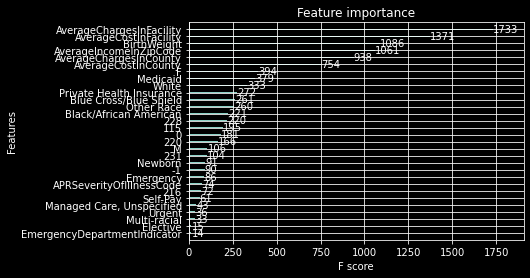

<Figure size 3600x3600 with 0 Axes>

In [50]:
from xgboost import plot_importance

plot_importance(xgb, max_num_features = 30)
plt.figure(figsize=(50,50))
plt.show()

## 11. Apply on Test dataset

In [51]:
test_data = pd.read_csv("test_data.csv")
submission = pd.DataFrame(columns=['ID','LengthOfStay'])
submission['ID'] = test_data['ID']
test_data = test_data.drop(['ID','HealthServiceArea'], axis = 1)

test_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74
3,M,Other Race,Newborn,228,1,Medicaid,3300,N,2611,9227,3790,6250,45
4,F,Other Race,Newborn,220,2,Medicaid,3800,N,3155,11381,3032,10135,59


In [52]:
for col in test_data.columns:
    print(col)
    count = test_data[col].value_counts()
    percent = test_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

Gender
   Counts Percent
M   35471  51.28%
F   33704  48.72%
U       2    0.0%
--------------------------------
Race
                        Counts Percent
White                    30432  43.99%
Other Race               27043  39.09%
Black/African American   10780  15.58%
Multi-racial               922   1.33%
--------------------------------
TypeOfAdmission
           Counts Percent
Newborn     68125  98.48%
Emergency     495   0.72%
Urgent        362   0.52%
Elective      194   0.28%
Trauma          1    0.0%
--------------------------------
CCSProcedureCode
      Counts Percent
 228   24212   35.0%
 0     15120  21.86%
 220   13108  18.95%
 115   12819  18.53%
 231    2535   3.66%
 216     764    1.1%
-1       619   0.89%
--------------------------------
APRSeverityOfIllnessCode
   Counts Percent
1   55243  79.86%
2   10935  15.81%
3    2998   4.33%
4       1    0.0%
--------------------------------
PaymentTypology
                           Counts Percent
Medicaid                  

In [53]:
test_copy = test_data.copy()

test_copy['PaymentTypology'] = test_copy['PaymentTypology'].replace(to_replace ="Department of Corrections", value = "Unknown")
test_copy['EmergencyDepartmentIndicator'] = test_copy['EmergencyDepartmentIndicator'].apply(lambda x: 1 if x == "Y" else 0)

for col in encode_col:
    dummy = pd.get_dummies(test_copy[col])
    test_copy = pd.concat([test_copy, dummy], axis=1)
    test_copy = test_copy.drop(col, axis=1)

# Drop encoded-columns           
test_copy.drop(columns = ['U','Trauma'],inplace = True)
              
# Check test_copy
test_copy.columns

Index([    'APRSeverityOfIllnessCode',                  'BirthWeight',
       'EmergencyDepartmentIndicator',          'AverageCostInCounty',
             'AverageChargesInCounty',        'AverageCostInFacility',
           'AverageChargesInFacility',       'AverageIncomeInZipCode',
                                  'F',                            'M',
             'Black/African American',                 'Multi-racial',
                         'Other Race',                        'White',
                           'Elective',                    'Emergency',
                            'Newborn',                       'Urgent',
                                   -1,                              0,
                                  115,                            216,
                                  220,                            228,
                                  231,       'Blue Cross/Blue Shield',
             'Federal/State/Local/VA',    'Managed Care, Unspecified',
      

In [77]:
test_transform = scaler.transform(test_copy)

pred_xgb = xgb.predict(test_copy)
pred_log = RF_clf.predict(test_transform)

pred_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
u,c = np.unique(pred_xgb, return_counts = True)
u1,c1 = np.unique(pred_log, return_counts = True)
print(dict(zip(u,c)))
print(dict(zip(u1,c1)))

{0: 68005, 1: 1172}
{0: 69177}


In [67]:
submission['LengthOfStay'] = pd.Series(pred_log)

submission.to_csv('DecisionTree.csv',index=False)

Kaggle 30% of test data set and count class 0 and 1

* Logistic Regression: 0.91013 with {0: 66902, 1: 2275}

* Decision Tree: 0.91871 with {0: 69164, 1: 13}

* Random Forest: 0.91871 with {0: 69177, 1: 0}



## 11. Reference

[1] Rafael Gomes Mantovani, Tomáš Horváth, Ricardo Cerri, Sylvio Barbon Junior, Joaquin Vanschoren, André Carlos Ponce de Leon Ferreira de Carvalho, “An empirical study on hyperparameter tuning of decision trees”
arXiv:1812.02207. Online: https://arxiv.org/abs/1812.02207